In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
dataPos = pd.read_csv('dataset/pos_cleaned_25k_yelp.csv')
dataNeg = pd.read_csv('dataset/neg_cleaned_25k_yelp.csv')
dataAvg = pd.read_csv('dataset/avg_cleaned_25k_yelp.csv')

In [3]:
dataAll = pd.concat([dataPos,dataNeg,dataAvg])

In [4]:
dataAll.head()

,stars,date,text,useful
0,5,2016-10-11,Nice Find!\n\nWe just happened on this restaur...,0
1,4,2015-01-13,So customer service might not be the greatest ...,2
2,4,2014-05-29,Never knew about this coffee shop until they o...,0
3,4,2014-11-13,Came here the other day to get a 60-minute det...,7
4,5,2016-11-10,This place is a bit of an institution and I us...,0


In [29]:
dataAll.shape

(75000, 4)

In [4]:
def applyUsefulness(useful):
    if useful < 4:
        return 'low'
    if useful >= 4 and useful <8:
        return 'medium'
    if useful >= 8:
        return 'high'
UsefulnessColumn = dataAll['useful']
Usefulness = UsefulnessColumn.map(applyUsefulness)
dataAll['UsefulnessPolarity'] = Usefulness 
dataAll['UsefulnessPolarity'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [5]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(dataAll['text'])
print(X_train_counts.shape)

(75000, 80930)


In [6]:
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(data_tfidf.shape)

(75000, 80930)


In [7]:
train_set, test_set = train_test_split(dataAll, test_size = 0.5, random_state = 1) 

In [8]:
tc_counts = count_vect.transform(train_set['text'])
print(tc_counts.shape)
X_train_tfidf = tfidf_transformer.fit_transform(tc_counts)
print(X_train_tfidf.shape)

(37500, 80930)
(37500, 80930)


In [9]:
clfPre = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(X_train_tfidf, train_set['stars'])

In [10]:
res = clfPre.predict(data_tfidf)

In [72]:
res.shape

(75000,)

In [11]:
dataAll['gradefromtext']=res

In [12]:
dataAll.head(20)

,stars,date,text,useful,UsefulnessPolarity,gradefromtext
0,5,2016-10-11,Nice Find!\n\nWe just happened on this restaur...,0,low,3
1,4,2015-01-13,So customer service might not be the greatest ...,2,low,5
2,4,2014-05-29,Never knew about this coffee shop until they o...,0,low,5
3,4,2014-11-13,Came here the other day to get a 60-minute det...,7,medium,3
4,5,2016-11-10,This place is a bit of an institution and I us...,0,low,3
5,5,2016-11-04,The show is very funny naughty..... and uncens...,0,low,5
6,5,2017-01-17,Wow i know i just stumbled upon the coolest pl...,0,low,5
7,5,2012-03-17,We arrived after 6pm on a Friday night. There ...,0,low,5
8,5,2015-08-23,Went in for a quick bite on our first night in...,0,low,5
9,5,2016-09-02,First time there to see Jen Kirkman. Really ex...,0,low,5


In [40]:
## We get a sentimental result from the text

In [102]:
pip install catboost

     |████████████████████████████████| 10.7MB 25kB/s eta 0:00:011
     |████████████████████████████████| 7.1MB 129kB/s eta 0:00:01          | 3.1MB 91kB/s eta 0:00:44
Note: you may need to restart the kernel to use updated packages.


In [13]:
import catboost
model = catboost.CatBoostClassifier()
model.fit(X_train_tfidf, train_set['UsefulnessPolarity'],use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.095192
0:	learn: 0.9733943	total: 5.87s	remaining: 1h 37m 42s
1:	learn: 0.8779972	total: 9.75s	remaining: 1h 21m 6s
2:	learn: 0.8027162	total: 12.2s	remaining: 1h 7m 39s
3:	learn: 0.7419789	total: 15.6s	remaining: 1h 4m 46s
4:	learn: 0.6919232	total: 18.5s	remaining: 1h 1m 12s
5:	learn: 0.6506027	total: 20.4s	remaining: 56m 19s
6:	learn: 0.6160066	total: 22.7s	remaining: 53m 38s
7:	learn: 0.5863271	total: 25.3s	remaining: 52m 22s
8:	learn: 0.5611887	total: 27.8s	remaining: 51m 4s
9:	learn: 0.5394911	total: 30.1s	remaining: 49m 39s
10:	learn: 0.5205033	total: 32.3s	remaining: 48m 19s
11:	learn: 0.5038928	total: 34.3s	remaining: 47m 7s
12:	learn: 0.4901044	total: 36.6s	remaining: 46m 19s
13:	learn: 0.4779852	total: 39s	remaining: 45m 46s
14:	learn: 0.4672762	total: 41.1s	remaining: 44m 56s
15:	learn: 0.4578349	total: 43.3s	remaining: 44m 19s
16:	learn: 0.4493931	total: 45.2s	remaining: 43m 32s
17:	learn: 0.4421259	total: 47s	remaining: 42m 45s
18:	learn: 0.4361604	

153:	learn: 0.3652122	total: 8m 24s	remaining: 46m 10s
154:	learn: 0.3651384	total: 8m 27s	remaining: 46m 6s
155:	learn: 0.3650560	total: 8m 30s	remaining: 45m 59s
156:	learn: 0.3649891	total: 8m 32s	remaining: 45m 50s
157:	learn: 0.3649405	total: 8m 34s	remaining: 45m 42s
158:	learn: 0.3648685	total: 8m 36s	remaining: 45m 34s
159:	learn: 0.3647991	total: 8m 39s	remaining: 45m 27s
160:	learn: 0.3647172	total: 8m 41s	remaining: 45m 18s
161:	learn: 0.3646333	total: 8m 44s	remaining: 45m 13s
162:	learn: 0.3645517	total: 8m 47s	remaining: 45m 7s
163:	learn: 0.3644728	total: 8m 50s	remaining: 45m 3s
164:	learn: 0.3643199	total: 8m 53s	remaining: 44m 58s
165:	learn: 0.3642069	total: 8m 56s	remaining: 44m 53s
166:	learn: 0.3640742	total: 8m 58s	remaining: 44m 47s
167:	learn: 0.3640109	total: 9m 1s	remaining: 44m 40s
168:	learn: 0.3638647	total: 9m 3s	remaining: 44m 33s
169:	learn: 0.3637560	total: 9m 6s	remaining: 44m 25s
170:	learn: 0.3635815	total: 9m 8s	remaining: 44m 18s
171:	learn: 0.363

301:	learn: 0.3553261	total: 14m 58s	remaining: 34m 36s
302:	learn: 0.3552924	total: 15m 1s	remaining: 34m 32s
303:	learn: 0.3552442	total: 15m 3s	remaining: 34m 29s
304:	learn: 0.3550895	total: 15m 7s	remaining: 34m 26s
305:	learn: 0.3550506	total: 15m 10s	remaining: 34m 24s
306:	learn: 0.3549469	total: 15m 13s	remaining: 34m 21s
307:	learn: 0.3548935	total: 15m 16s	remaining: 34m 19s
308:	learn: 0.3548001	total: 15m 19s	remaining: 34m 15s
309:	learn: 0.3547423	total: 15m 21s	remaining: 34m 11s
310:	learn: 0.3546980	total: 15m 24s	remaining: 34m 7s
311:	learn: 0.3546742	total: 15m 27s	remaining: 34m 4s
312:	learn: 0.3546568	total: 15m 29s	remaining: 34m 1s
313:	learn: 0.3546324	total: 15m 33s	remaining: 33m 59s
314:	learn: 0.3545918	total: 15m 35s	remaining: 33m 55s
315:	learn: 0.3545534	total: 15m 38s	remaining: 33m 51s
316:	learn: 0.3545131	total: 15m 40s	remaining: 33m 47s
317:	learn: 0.3544399	total: 15m 43s	remaining: 33m 43s
318:	learn: 0.3543977	total: 15m 46s	remaining: 33m 39

449:	learn: 0.3482968	total: 23m 47s	remaining: 29m 4s
450:	learn: 0.3482416	total: 23m 50s	remaining: 29m
451:	learn: 0.3480912	total: 23m 53s	remaining: 28m 57s
452:	learn: 0.3480632	total: 23m 57s	remaining: 28m 55s
453:	learn: 0.3480073	total: 24m 1s	remaining: 28m 54s
454:	learn: 0.3479566	total: 24m 5s	remaining: 28m 52s
455:	learn: 0.3479308	total: 24m 9s	remaining: 28m 49s
456:	learn: 0.3478676	total: 24m 14s	remaining: 28m 48s
457:	learn: 0.3478177	total: 24m 20s	remaining: 28m 48s
458:	learn: 0.3477921	total: 24m 24s	remaining: 28m 45s
459:	learn: 0.3477584	total: 24m 28s	remaining: 28m 44s
460:	learn: 0.3477101	total: 24m 32s	remaining: 28m 41s
461:	learn: 0.3476817	total: 24m 36s	remaining: 28m 39s
462:	learn: 0.3476372	total: 24m 40s	remaining: 28m 36s
463:	learn: 0.3475914	total: 24m 43s	remaining: 28m 33s
464:	learn: 0.3475614	total: 24m 45s	remaining: 28m 28s
465:	learn: 0.3475171	total: 24m 47s	remaining: 28m 24s
466:	learn: 0.3474901	total: 24m 50s	remaining: 28m 20s


597:	learn: 0.3423136	total: 31m 4s	remaining: 20m 53s
598:	learn: 0.3422743	total: 31m 6s	remaining: 20m 49s
599:	learn: 0.3422461	total: 31m 8s	remaining: 20m 45s
600:	learn: 0.3422181	total: 31m 11s	remaining: 20m 42s
601:	learn: 0.3421955	total: 31m 13s	remaining: 20m 38s
602:	learn: 0.3421336	total: 31m 19s	remaining: 20m 37s
603:	learn: 0.3421175	total: 31m 27s	remaining: 20m 37s
604:	learn: 0.3420792	total: 31m 33s	remaining: 20m 36s
605:	learn: 0.3420045	total: 31m 40s	remaining: 20m 35s
606:	learn: 0.3419726	total: 31m 46s	remaining: 20m 34s
607:	learn: 0.3419509	total: 32m 33s	remaining: 20m 59s
608:	learn: 0.3419202	total: 32m 39s	remaining: 20m 58s
609:	learn: 0.3418978	total: 32m 44s	remaining: 20m 55s
610:	learn: 0.3418513	total: 32m 48s	remaining: 20m 53s
611:	learn: 0.3418299	total: 32m 54s	remaining: 20m 51s
612:	learn: 0.3417848	total: 32m 59s	remaining: 20m 49s
613:	learn: 0.3417423	total: 33m 4s	remaining: 20m 47s
614:	learn: 0.3417023	total: 33m 10s	remaining: 20m 

745:	learn: 0.3370411	total: 41m 24s	remaining: 14m 5s
746:	learn: 0.3370243	total: 41m 28s	remaining: 14m 2s
747:	learn: 0.3370029	total: 41m 30s	remaining: 13m 59s
748:	learn: 0.3369789	total: 41m 33s	remaining: 13m 55s
749:	learn: 0.3369470	total: 41m 35s	remaining: 13m 51s
750:	learn: 0.3369302	total: 41m 37s	remaining: 13m 48s
751:	learn: 0.3368984	total: 41m 39s	remaining: 13m 44s
752:	learn: 0.3368773	total: 41m 42s	remaining: 13m 40s
753:	learn: 0.3368533	total: 41m 44s	remaining: 13m 37s
754:	learn: 0.3368281	total: 41m 46s	remaining: 13m 33s
755:	learn: 0.3368009	total: 41m 48s	remaining: 13m 29s
756:	learn: 0.3367765	total: 41m 52s	remaining: 13m 26s
757:	learn: 0.3367375	total: 41m 57s	remaining: 13m 23s
758:	learn: 0.3366990	total: 42m	remaining: 13m 20s
759:	learn: 0.3366668	total: 42m 2s	remaining: 13m 16s
760:	learn: 0.3366246	total: 42m 4s	remaining: 13m 12s
761:	learn: 0.3365985	total: 42m 6s	remaining: 13m 9s
762:	learn: 0.3365882	total: 42m 9s	remaining: 13m 5s
763:

894:	learn: 0.3321596	total: 52m 47s	remaining: 6m 11s
895:	learn: 0.3320672	total: 52m 52s	remaining: 6m 8s
896:	learn: 0.3320126	total: 52m 55s	remaining: 6m 4s
897:	learn: 0.3319784	total: 52m 57s	remaining: 6m
898:	learn: 0.3319484	total: 53m	remaining: 5m 57s
899:	learn: 0.3318998	total: 53m 4s	remaining: 5m 53s
900:	learn: 0.3318368	total: 53m 7s	remaining: 5m 50s
901:	learn: 0.3318096	total: 53m 10s	remaining: 5m 46s
902:	learn: 0.3317585	total: 53m 19s	remaining: 5m 43s
903:	learn: 0.3317270	total: 53m 29s	remaining: 5m 40s
904:	learn: 0.3317005	total: 54m 20s	remaining: 5m 42s
905:	learn: 0.3316882	total: 54m 27s	remaining: 5m 39s
906:	learn: 0.3316692	total: 54m 33s	remaining: 5m 35s
907:	learn: 0.3316411	total: 54m 38s	remaining: 5m 32s
908:	learn: 0.3316187	total: 54m 44s	remaining: 5m 28s
909:	learn: 0.3315903	total: 54m 47s	remaining: 5m 25s
910:	learn: 0.3315491	total: 54m 51s	remaining: 5m 21s
911:	learn: 0.3315127	total: 54m 56s	remaining: 5m 18s
912:	learn: 0.3314711	

In [14]:
y_pred = model.predict(data_tfidf)

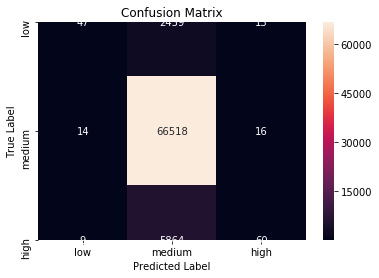

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(dataAll['UsefulnessPolarity'],y_pred)
class_label = ["low", "medium", "high"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
dataAll['tagBycat']=y_pred
dataAll.head()

,stars,date,text,useful,UsefulnessPolarity,gradefromtext,tagBycat
0,5,2016-10-11,Nice Find!\n\nWe just happened on this restaur...,0,low,3,low
1,4,2015-01-13,So customer service might not be the greatest ...,2,low,5,low
2,4,2014-05-29,Never knew about this coffee shop until they o...,0,low,5,low
3,4,2014-11-13,Came here the other day to get a 60-minute det...,7,medium,3,low
4,5,2016-11-10,This place is a bit of an institution and I us...,0,low,3,low


In [17]:
clfPre = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(X_train_tfidf, train_set['UsefulnessPolarity'])

In [18]:
clfres = clfPre.predict(data_tfidf)

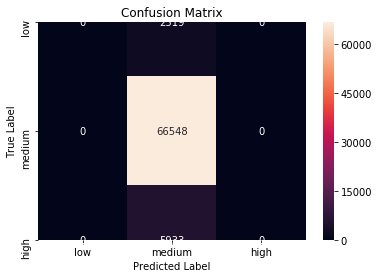

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(dataAll['UsefulnessPolarity'],clfres)
class_label = ["low", "medium", "high"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
dataAll['tagByClf']=clfres
dataAll.head()

,stars,date,text,useful,UsefulnessPolarity,gradefromtext,tagBycat,tagByClf
0,5,2016-10-11,Nice Find!\n\nWe just happened on this restaur...,0,low,3,low,low
1,4,2015-01-13,So customer service might not be the greatest ...,2,low,5,low,low
2,4,2014-05-29,Never knew about this coffee shop until they o...,0,low,5,low,low
3,4,2014-11-13,Came here the other day to get a 60-minute det...,7,medium,3,low,low
4,5,2016-11-10,This place is a bit of an institution and I us...,0,low,3,low,low


In [23]:
dataAll.to_csv('dataset/tagwithsentandpre.csv', index=False)